In [1]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}
# html = urlopen("http://www.sundaytimes.lk/business")
#     bsObj = BeautifulSoup(html, features="html.parser")
#     posts = bsObj.findAll("div", {"class": "col-md-7"})
#     # print(posts)
#     for post in posts:
#         time.sleep(1)
#         url = post.a['href']
#         date = post.p.span.text
#         print(date,url)

for i in range(1,100):
    html = urlopen("http://www.sundaytimes.lk/search/John%20keells/"+str(i))
    bsObj = BeautifulSoup(html, features="html.parser")
    posts = bsObj.findAll("div", {"class": "col-md-7"})
    # print(posts)
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.p.span.text
        date = date[1:-3]
        date = date.replace(',', '')
        date = datetime.strptime(date, "%B %d %Y %H:%M").strftime("%d/%m/%Y");
#         print(newDate)
#         print(date,url)
        try:
            link_page = urlopen(url).read()
        except:
            url = url[:-2]
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page,"html5lib")
        sentences = link_soup.findAll("p")
        
#         print(sentences)
        
        passage = ""
        for sentence in sentences:
            if('class' in sentence.attrs):
                unwanted = sentence.text
            else:
                passage += sentence.text 
#         print(passage)
        sentiment = sia.polarity_scores(passage)['compound']
#         print(date, sentiment)
        date_sentiments.setdefault(date, []).append(sentiment)
#         print(date_sentiments)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d/%m/%Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())
print(earliest_date)
# print(date_sentiment.keys(),date_sentiment.values())



2015-10-30


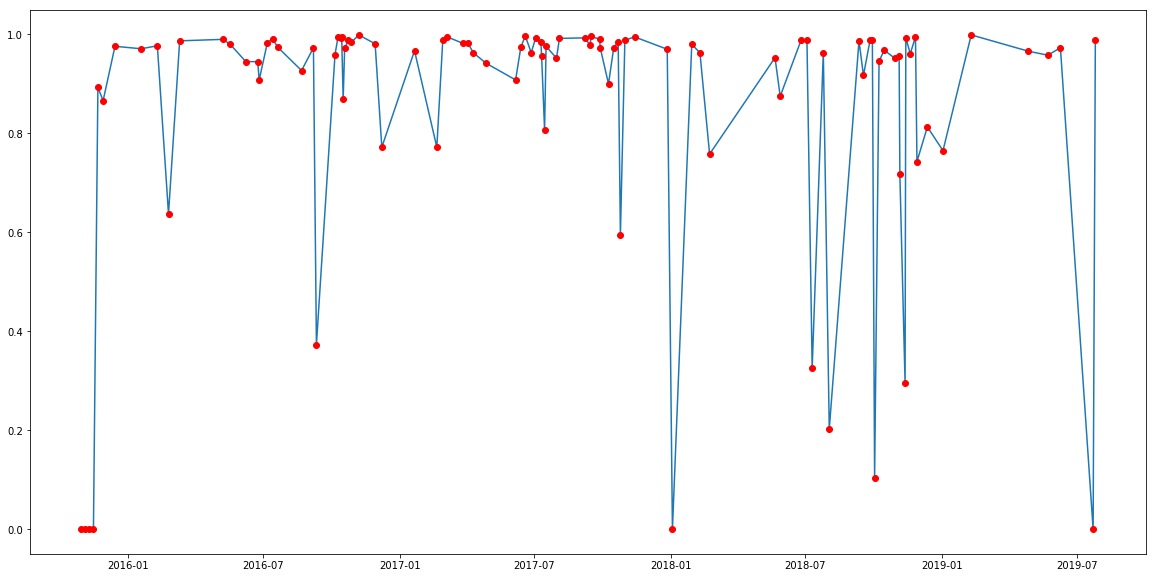

In [2]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(date_sentiment.keys(),date_sentiment.values())

plt.plot(date_sentiment.keys(),date_sentiment.values(),'ro')